**420-A58-SF - Algorithmes d'apprentissage non supervisé - Hiver 2023 - Spécialisation technique en Intelligence Artificielle**<br/>
MIT License - Copyright (c) 2023 Mikaël Swawola
<br/>
![Travaux Pratiques - partitionnement-k-moyennes (implementation)](static/01-02-A1-banner.png)
<br/>
**Objectif:** cette séance de travaux pratiques a pour objectif l'implémentation sous forme de code Python de l'**algorithme des K-moyennes** et de sa mise en œuvre

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## 1 - Lecture des données

**Exercice 1 - À l'aide de la librairie Pandas, lire le fichier de données `blobs.csv`**

In [2]:
# Compléter cette cellule ~ 2 lignes de code
import pandas as pd
df = pd.read_csv("../../data/blobs.csv")
df.head()

,x0,x1
0,10.947841,2.028498
1,3.675247,-10.206901
2,5.809632,4.076479
3,8.053083,1.129893
4,5.681480,4.405307


## 2 - Visualisation des données

**Exercice 2 - En utilisant un type de graphique approprié, visualiser les données. Combien de clusters semblent présents ?**

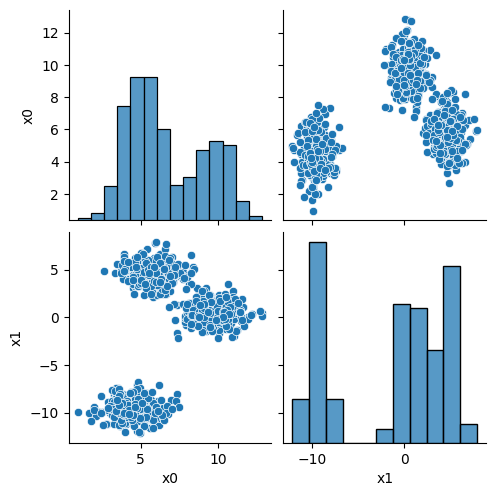

In [3]:
# Compléter cette cellule ~ de 2 à 7 lignes de code
import seaborn as sn
sn.pairplot(df)

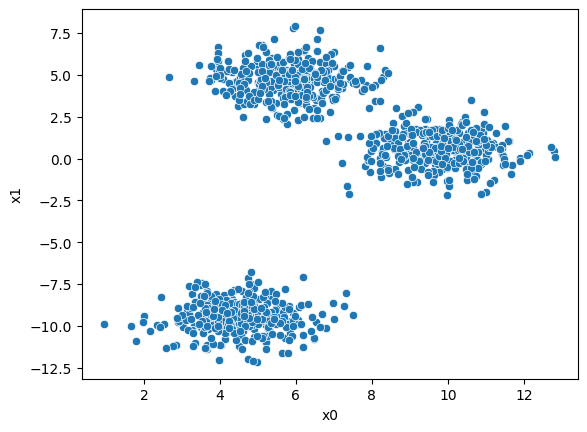

In [6]:
_ = sn.scatterplot(x="x0", y ="x1", data=df)

## 3 - Implémentation de l'algorithme des K-moyennes

**Exercice 3-1 - Initialiser la variable K, représentant le nombre de clusters estimé à partir de la visualisation précédente**

In [4]:
# Compléter cette cellule ~ 1 ligne de code
k = 3 ## 3 = 3 grupos da figura acima


**Exercice 3-2 - Mettre les données à l'échelle. Visualiser de nouveau les données**

In [5]:
# Compléter cette cellule ~ 3 lignes de code
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)


**Exercice 3-3 - Initialiser les K centroïdes. Pour ce, vous pouvez choisir aléatoirement K observations.** 

In [6]:
# Compléter cette cellule ~ de 2 à 4 lignes de code
import numpy as np
np.random.seed(2023)

rand_obs = np.random.choice(X.shape[0], size=k, replace=False)
print(rand_obs)

centroids = X[rand_obs]
centroids

[847 874 471]


array([[-0.78374588, -1.09767698],
       [-0.76494377,  1.07966587],
       [ 1.83367271,  0.0181017 ]])

In [13]:
X.shape

(1000, 2)

**Exercice 3-4 - Sur la visualisation, afficher la position des K centroïdes initiaux**

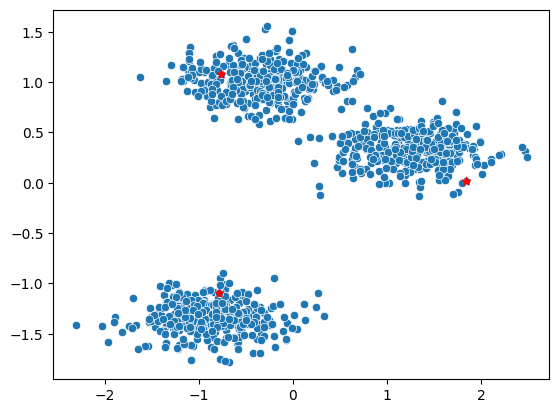

In [29]:
# Compléter cette cellule ~ de 2 à 4 lignes de code
import matplotlib.pyplot as plt
_ = sn.scatterplot(x=X[:, 0], y=X[:, 1], data=X)
plt.scatter(centroids[:, 0], centroids[:,1], c= 'r', marker='*')

**Exercice 3-5 - Afin de faciliter l'implémentation ultérieure de l'algorithme des K-moyennes, calculer la distance euclidienne (L2) entre le point A (-1,-1) et chacun des K centroïdes. Trouver ensuite l'index du centroïde le plus proche**

In [39]:
import sys
print(sys.maxint) 

AttributeError: module 'sys' has no attribute 'maxint'

In [47]:
# Compléter cette cellule ~ 4 lignes de code

A = np.array([-1, -1])
#L2 = np.linalg.norm(A - centroids)
L2 = np.sqrt(np.sum((A-centroids)**2, axis=1))
plus_proche = np.argmin(L2)
print('[plus_proche]: ', plus_proche)
#print('[plus_proche]: ', L2[plus_proche])
print(f'Centroide le plus proche:  {plus_proche} {centroids[plus_proche, :]} ({np.min(L2)})')
print(L2)

[plus_proche]:  0
Centroide le plus proche:  0 [-0.78374588 -1.09767698] (0.23729020144775473)
[0.2372902  2.09290745 3.01101845]


**Exercice 3-6 - Implémenter l'algorithme des K-moyennes tel que vu en cours. Pour appel, le *pseudo code* de l'algorithme est le suivant:**
* Choix de K (fait plus haut, exercice 3-1)
* Standardisation des données (fait plus haut, exercice 3-2)
* Initialisation des K centroïdes (fait plus haut, exercice 3-3)
* Pour n_iterations: **(partie à coder !)**
    * Assignation des observations à un cluster (centroïde le plus "proche"). La distance euclidienne sera utilisée ici (exercice 3-5)
    * Déplacement des centroïdes (moyenne des observations associées à un cluster)

<details>
<summary>
    <font size="3" color="darkgreen"><b>Cliquer ici pour obtenir un indice</b></font>
</summary>
<p>
Vous devrez créer un tableau représentant le cluster associé à chaque observation
</p>

In [69]:
## gabarito
max_iter = 10
c = np.zeros(shape=(X.shape[0], 1))
for i in range(1, max_iter):
    ## assigantion
    for j, x in enumerate(X):
        A = X[i]
        L2 = np.sqrt(np.sum((A-centroids)**2, axis=1)) 
        c[j] = np.argmin(L2)

    ## calcul de la moyenne
    for k in range(0, k):
        mask = (c ==k).flatten()
        nouvelle_val = X[mask, :].mean(axis=0)
        centroids[k, :] = nouvelle_val

/tmp/ipykernel_7482/2636767051.py:14: RuntimeWarning: Mean of empty slice.
  nouvelle_val = X[mask, :].mean(axis=0)
/home/hadoop/.local/lib/python3.11/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [66]:
# Compléter cette cellule ~ de 10 à 20 lignes de code
dictCentroids = {}

max_iter = len(X)
for i in range(0, 3):
    A = X[i]
    L2 = np.sqrt(np.sum((A-centroids)**2, axis=1)) 
    plus_proche = np.argmin(L2)
    print(f'Centroide le plus proche:  {plus_proche} {centroids[plus_proche, :]} ({np.min(L2)})')
    print (type(centroids[plus_proche, :]))
    dictCentroids.update({plus_proche: dictCentroids[plus_proche] centroids[plus_proche, :]})


for key in dictCentroids:
    print (key)
    print (dictCentroids[key])
print(dictCentroids)

Centroide le plus proche:  2 [1.83367271 0.0181017 ] (0.5642621245048024)
<class 'numpy.ndarray'>


KeyError: 2

**Exercice 3-7 - Afficher la position des clusters. Visualiser également les observations et leur association à un des K clusters**

<details>
<summary>
    <font size="3" color="darkgreen"><b>Cliquer ici pour obtenir un indice</b></font>
</summary>
<p>
Utiliser `hue`
</p>

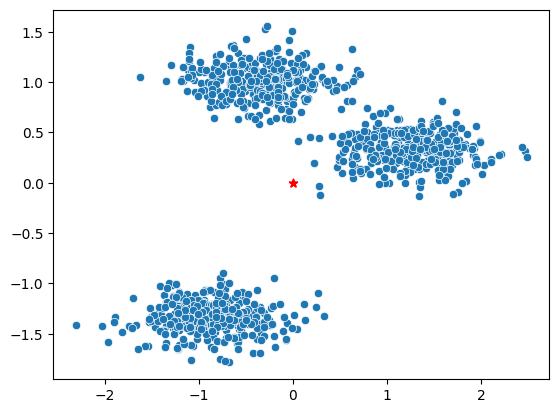

In [71]:
# Compléter cette cellule ~ de 2 à 4 lignes de code
_ = sn.scatterplot(x=X[:, 0], y=X[:, 1], data=X)
plt.scatter(centroids[:, 0], centroids[:,1], c= 'r', marker='*')

**Exercice 3-8 - Calculer la distorsion**

In [ ]:
# Compléter cette cellule ~ 2 lignes de code

## 4 - Intégration de l'algorithme dans une fonction

**Exercice 4 - Intégrer l'ensemble de l'algorithme des K-moyennes, incluant l'initalisation aléatoire des K centroïdes `n_init` fois, dans une fonction**
<br/>
* Cette fonction prend en argument les données, le nombre de clusters, le nombre d'itérations de l'algorithme et le nombre d'initialisations aléatoires des K centroïdes
* Les valeurs retournées sont la distorsion et les centroïdes

In [ ]:
# Compléter cette cellule

## 5 - Nombre optimal de centroïdes

**Exercice 5 - Faire varier le nombre de centroïdes K de 2 à 10 et vérifier sa valeur optimale à l'aide de la technique du "coude"**

In [ ]:
# Compléter la cellule ~ 4-5 lignes de code

## 6 - Exercices optionnels

**Exercice 6-1 - Ajouter un critère de convergence**

In [ ]:
# Compléter la cellule

**Exercice 6-2 - Suppression des clusters vides**

In [ ]:
# Compléter la cellule

**Fin de l'atelier 01-02-A1**